In [7]:
import numpy as np
import matplotlib.pyplot as plt

# From https://blogs.uoregon.edu/math342sp16lipshitz/sample-page/least-squares-fourier-series/
def least_squares(A,v):
     return (A.transpose()*A).solve_right(A.transpose()*v)

Q1A = matrix([[1, 0], [0, -1], [1, 1]])
Q1b = vector([2,1,3])

show(Q1A)
show(Q1b)

[ 1  0]
[ 0 -1]
[ 1  1]

(2, 1, 3)

In [14]:
show(least_squares(Q1A, Q1b))
show(np.linalg.lstsq(Q1A, Q1b, rcond=None)[0])

(8/3, -1/3)

array([ 2.66666667, -0.33333333])

## Question 2

In [16]:
Q2A = matrix([[1,-1],[2,0],[1,3]])
Q2b = vector([0,8,20])

show(Q2A)
show(Q2b)

[ 1 -1]
[ 2  0]
[ 1  3]

(0, 8, 20)

In [17]:
show(least_squares(Q2A, Q2b))
show(n(least_squares(Q2A, Q2b)))
show(np.linalg.lstsq(Q2A, Q2b, rcond=None)[0])

(30/7, 36/7)

(4.28571428571429, 5.14285714285714)

array([4.28571429, 5.14285714])

## Question 3

In [19]:
Q3A = matrix([[2,1],[1,2],[2,1]])
Q3b = vector([3,4,3])

show(Q3A)
show(Q3b)

[2 1]
[1 2]
[2 1]

(3, 4, 3)

In [20]:
show(least_squares(Q3A, Q3b))
show(n(least_squares(Q3A, Q3b)))
show(np.linalg.lstsq(Q3A, Q3b, rcond=None)[0])

(2/3, 5/3)

(0.666666666666667, 1.66666666666667)

array([0.66666667, 1.66666667])

## Question 4

x |--> a*x + b

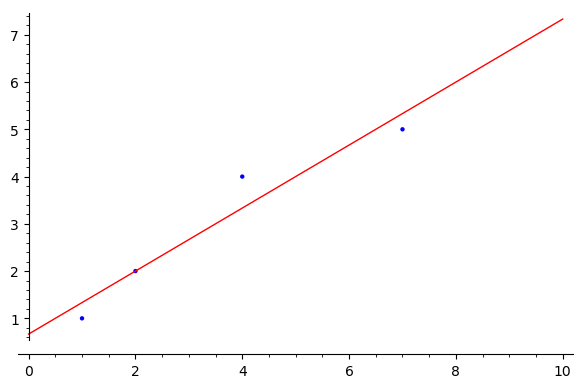

{b: 0.6666666666659395, a: 0.6666666666659397}

In [45]:
var('a,b,x')
linear_model(x) = a*x + b

Q4points = matrix([[1,1],[2,2],[4,4],[7,5]])
Q4fit = find_fit(Q4points, linear_model, solution_dict=True)

show(linear_model)

show(points(Q4points, color='blue') + plot(
    linear_model(
        a=Q4fit[a],
        b=Q4fit[b],
    ),
    (x, 0, 10,),
    color='red'
))

show(Q4fit)

### More manually using code

In [22]:
Q4A = matrix([[1,1],[1,2],[1,4],[1,7]])
Q4b = vector([1,2,4,5])

show(Q4A)
show(Q4b)

[1 1]
[1 2]
[1 4]
[1 7]

(1, 2, 4, 5)

In [23]:
show(least_squares(Q4A, Q4b))
show(n(least_squares(Q4A, Q4b)))
show(np.linalg.lstsq(Q4A, Q4b, rcond=None)[0])

(2/3, 2/3)

(0.666666666666667, 0.666666666666667)

array([0.66666667, 0.66666667])

## Question 5

In [3]:
var('a,b,c,d,e,f')

Q5A = matrix([[a,b],[c,d],[e,f]])

Q5AT = Q5A.transpose()

show(Q5A)
show(Q5AT)

Q5ATA = Q5AT * Q5A

show(Q5ATA)
show(Q5ATA[0][1]==Q5ATA[1][0])

[a b]
[c d]
[e f]

[a c e]
[b d f]

[a^2 + c^2 + e^2 a*b + c*d + e*f]
[a*b + c*d + e*f b^2 + d^2 + f^2]

a*b + c*d + e*f == a*b + c*d + e*f

## Question 6

In [56]:
## var('a,b,c,d,e,f')
Q6A = matrix([[a,b,a + b],[d,e,d+e]])
Q6AT = Q6A.transpose()

show(Q6A)
show(Q6AT)

Q6ATA = Q6AT*Q6A

show(Q6ATA)

show("Show that it is linearly dependent\n")
#show(Q6ATA.augment(vector([0,0,0])).rref())
#show(Q6A.rank(), Q6AT.rank(), Q6ATA.rank())
show(expand(Q6ATA[0][2] + Q6ATA[1][2])==expand(Q6ATA[2][2]))

[    a     b a + b]
[    d     e d + e]

[    a     d]
[    b     e]
[a + b d + e]

[            a^2 + d^2             a*b + d*e (a + b)*a + (d + e)*d]
[            a*b + d*e             b^2 + e^2 (a + b)*b + (d + e)*e]
[(a + b)*a + (d + e)*d (a + b)*b + (d + e)*e (a + b)^2 + (d + e)^2]

'Show that it is linearly dependent\n'

a^2 + 2*a*b + b^2 + d^2 + 2*d*e + e^2 == a^2 + 2*a*b + b^2 + d^2 + 2*d*e + e^2

## Question 7

*** dataset 1 ***
linear:
f(t) = 4.289703 t + 49.660050
||b - Ax|| = 141.932121

quadratic:
f(t) = -2.014952 t^2 + 25.084056 t + 11.068019
||b - Ax|| = 16.100444


*** dataset 2 ***
linear:
f(t) = -5.042689 t + 21.242434
||b - Ax|| = 16.073925

quadratic:
f(t) = -0.041754 t^2 + -4.628278 t + 20.587832
||b - Ax|| = 15.753764




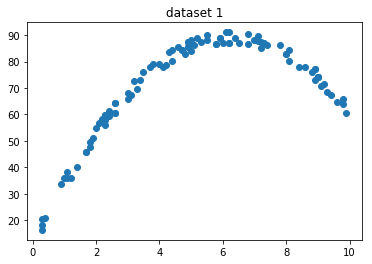

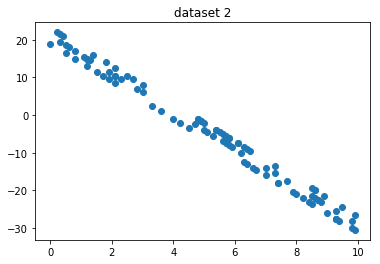

In [8]:
def applyLS(t, bhat) :
    """ fits linear and quadratic models to data using least squares

    parameters:     1D numpy array, 1D numpy array
    return values:  1D numpy array, float, 1D numpy array, float
    """

    # student code goes here
    A_linear = np.array([np.ones(len(t)), t]).transpose()
    b = np.array(bhat)

    x_lin = np.linalg.lstsq(A_linear, b, rcond=None)[0]
    norm_lin = np.linalg.norm(b-(A_linear.dot(x_lin)))
    
    A_quadratic = np.array([np.ones(len(t)), t, t ** 2]).transpose()

    x_q = np.linalg.lstsq(A_quadratic, b, rcond=None)[0]
    norm_q = np.linalg.norm(b-(A_quadratic.dot(x_q)))

    return np.array([x_lin, norm_lin, x_q, norm_q])

def printResults(name, t, ft, x_lin, norm_l, x_q, norm_q) :
    # do not change this function
    print("*** %s ***" % name)
    print("linear:")
    print("f(t) = %f t + %f" % (x_lin[1], x_lin[0]) )
    print("||b - Ax|| = %f\n" % norm_l )
    
    print("quadratic:")
    print("f(t) = %f t^2 + %f t + %f" % (x_q[2], x_q[1], x_q[0]) )
    print("||b - Ax|| = %f" % norm_q )
    
    print("\n")
    
    plt.figure()
    plt.plot(t, ft, 'o')
    plt.title(name)


##########################################################
"""
    DO NOT CHANGE THE CODE BELOW

    a) you will put your logic in applyLS()
    b) you should look at the function calls below to get a better understanding
       of what the function receives and returns
    c) pay particular attention to the order of the model coefficients in the
       array (i.e, vector) in which they are returned
"""
if __name__ == "__main__":
    # data set 1 for producing functions of the form
    #   f(t) = a_0 + a_1t + a_2t^2 + ...
    t1 = np.array([6.4, 3.8, 8.1, 5.3, 3.5, 9.4, 8.8, 5.5, 6.2, 5.9, 2.1, \
                   3.0, 4.7, 2.3, 8.4, 1.9, 2.3, 1.7, 2.3, 4.4, 3.1, 9.2, \
                   4.3, 1.8, 9.0, 9.8, 4.4, 1.1, 2.6, 4.1, 5.9, 2.6, 6.0, \
                   7.1, 2.2, 1.2, 3.0, 3.2, 4.2, 5.1, 0.9, 2.6, 8.0, 0.3, \
                   9.3, 7.3, 4.9, 5.8, 2.4, 4.6, 9.6, 5.5, 5.2, 2.3, 4.9, \
                   6.2, 6.8, 4.0, 3.7, 9.9, 0.4, 8.9, 9.1, 8.0, 1.0, 2.6, \
                   3.4, 6.8, 1.4, 7.2, 1.1, 6.5, 4.9, 7.8, 7.2, 9.0, 8.9, \
                   3.3, 7.0, 2.0, 0.3, 7.4, 5.0, 4.8, 9.0, 6.1, 6.2, 8.6, \
                   8.1, 5.8, 1.8, 2.4, 8.9, 0.3, 4.9, 1.7, 9.8, 7.1, 5.0, 4.7])
    
    ft1 = np.array([89.08, 79.12, 80.28, 87.32, 76.00, 67.28, 76.12, 90.00, \
                    87.12, 88.88, 56.68, 66.00, 84.32, 59.92, 77.88, 51.28, \
                    59.92, 45.72, 57.92, 84.28, 67.28, 71.72, 83.52, 47.52, \
                    74.00, 65.92, 80.28, 36.08, 64.48, 77.88, 88.88, 64.48, \
                    87.00, 87.68, 58.32, 36.12, 68.00, 72.52, 78.72, 86.48, \
                    33.88, 60.48, 83.00, 20.32, 68.52, 86.92, 87.48, 86.72, \
                    59.48, 85.68, 64.68, 88.00, 88.92, 55.92, 85.48, 91.12, \
                    86.52, 79.00, 78.12, 60.48, 20.68, 77.08, 70.88, 83.00, \
                    36.00, 60.48, 72.88, 90.52, 40.08, 87.32, 38.08, 87.00, \
                    85.48, 86.32, 85.32, 74.00, 77.08, 69.72, 88.00, 55.00, \
                    16.32, 86.48, 88.00, 82.92, 74.00, 91.08, 87.12, 78.08, \
                    84.28, 86.72, 49.52, 61.48, 73.08, 18.32, 87.48, 45.72, \
                    63.92, 89.68, 84.00, 84.32])
        
    
    x_lin, norm_l, x_q, norm_q = applyLS(t1, ft1)
    printResults("dataset 1", t1, ft1, x_lin, norm_l, x_q, norm_q)
    
    
    # data set 2 for producing functions of the form
    #   f(t) = a_0 + a_1t + a_2t^2 + ...
    t2 = np.array([8.5, 5.6, 9.3, 7.0, 5.8, 8.2, 8.8, 9.9, 0.0, 8.7, 6.1, \
                   9.9, 5.3, 4.8, 8.0, 2.3, 5.0, 9.0, 5.7, 8.5, 7.4, 5.9, \
                   2.5, 6.7, 0.8, 6.3, 6.6, 7.3, 8.9, 9.8, 7.7, 5.8, 9.3, \
                   5.8, 0.2, 1.2, 8.6, 4.8, 8.4, 2.1, 5.5, 6.3, 0.3, 6.1, \
                   3.6, 0.5, 4.9, 1.9, 1.2, 2.1, 1.5, 1.9, 0.4, 6.4, 2.8, \
                   5.4, 7.0, 5.0, 5.4, 4.5, 1.2, 4.9, 8.5, 8.7, 2.7, 2.1, \
                   5.6, 6.4, 4.2, 2.1, 9.5, 0.8, 1.1, 1.4, 1.7, 6.2, 5.7, \
                   0.5, 9.3, 7.3, 7.4, 0.6, 8.6, 9.3, 9.8, 8.6, 7.9, 5.1, \
                   1.8, 4.0, 1.3, 0.3, 9.4, 3.0, 3.0, 3.3, 4.7, 6.5])
    
    ft2 = np.array([-21.5, -5.0, -27.5, -14.0, -6.0, -22.0, -23.0, -26.5, \
                     19.0, -22.5, -7.5, -30.5, -5.5, -1.0, -21.0, 9.5, -2.0, \
                    -26.0, -7.5, -19.5, -18.0, -8.5, 10.5, -14.5, 17.0, \
                     -8.5, -14.0, -15.5, -21.5, -30.0, -17.5, -6.0, -27.5, \
                     -8.0, 22.0, 13.0, -22.0, -1.0, -23.0, 10.5, -4.5, -12.5, \
                     19.5, -7.5, 1.0, 18.5, -1.5, 9.5, 15.0, 12.5, 11.5, \
                     11.5, 21.0, -13.0, 7.0, -4.0, -16.0, -4.0, -4.0, -3.5, \
                     15.0, -1.5, -23.5, -22.5, 9.5, 8.5, -7.0, -9.0, -2.0, \
                     10.5, -24.5, 15.0, 15.5, 16.0, 10.5, -10.0, -5.5, 16.5, \
                    -25.5, -13.5, -18.0, 18.0, -20.0, -27.5, -28.0, -20.0, \
                    -20.5, -4.5, 14.0, -1.0, 14.5, 21.5, -28.0, 6.0, 8.0, 2.5, \
                     -2.5, -9.5])
     
    x_lin, norm_l, x_q, norm_q = applyLS(t2, ft2)
    printResults("dataset 2", t2, ft2, x_lin, norm_l, x_q, norm_q)

    plt.show()

